In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv("mouse_drug_data.csv")
trial_data = pd.read_csv("clinicaltrial_data.csv")
# Combine the data into a single dataset

#combined_data = pd.merge(mouse_data,trial_data)
combined_data = pd.merge(trial_data, mouse_data, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor = combined_data.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
mean_tumor = pd.DataFrame(mean_tumor)

# Preview DataFrame
mean_tumor.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem = combined_data.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_sem =  pd.DataFrame(tumor_sem)
# Preview DataFrame
tumor_sem.head(10)


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977

In [5]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor = mean_tumor.reset_index()
mean_tumor_pivot = mean_tumor.pivot(index = "Timepoint", columns="Drug")["Tumor Volume (mm3)"]

tumor_sem = tumor_sem.reset_index()
tumor_sem_pivot = tumor_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
# Preview that Reformatting worked
mean_tumor_pivot.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


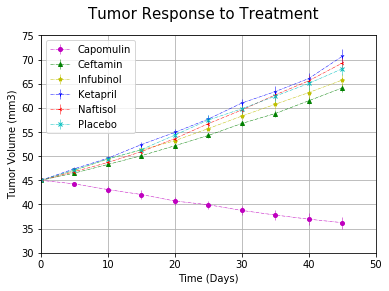

In [5]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 50, 5)

fig, ax = plt.subplots()

fig.suptitle("Tumor Response to Treatment", fontsize=15 )

ax.set_xlim(0, 50)
ax.set_ylim(30, 75)

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")

plt.grid(True)


plt.errorbar(mean_tumor_pivot.index, mean_tumor_pivot["Capomulin"], yerr = tumor_sem_pivot["Capomulin"], color = "m", marker = "o", markersize = "4", linestyle = "-.", linewidth = .5, label = "Capomulin")
plt.errorbar(mean_tumor_pivot.index, mean_tumor_pivot["Ceftamin"], yerr = tumor_sem_pivot["Ceftamin"], color = "g", marker = "^", markersize = "4", linestyle = "-.", linewidth = .5, label = "Ceftamin")
plt.errorbar(mean_tumor_pivot.index, mean_tumor_pivot["Infubinol"], yerr = tumor_sem_pivot["Infubinol"], color = "y", marker = "*", markersize = "4", linestyle = "-.", linewidth = .5, label = "Infubinol")
plt.errorbar(mean_tumor_pivot.index, mean_tumor_pivot["Ketapril"], yerr = tumor_sem_pivot["Ketapril"], color = "b", marker = "1", markersize = "4", linestyle = "-.", linewidth = .5, label = "Ketapril")
plt.errorbar(mean_tumor_pivot.index, mean_tumor_pivot["Naftisol"], yerr = tumor_sem_pivot["Naftisol"], color = "r", marker = "3", markersize = "4", linestyle = "-.", linewidth = .5, label="Naftisol")
plt.errorbar(mean_tumor_pivot.index, mean_tumor_pivot["Placebo"], yerr = tumor_sem_pivot["Placebo"], color = "c", marker = "x", markersize = "4", linestyle = "-.", linewidth = .5, label="Placebo")
plt.legend(loc="best")


# Save the Figure
plt.savefig("C:/Users/Ryan/Desktop/tumorResponse.png")


plt.show()


## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_meta_sites = combined_data.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]
# Convert to DataFrame
mean_meta_sites = pd.DataFrame(mean_meta_sites)
# Preview DataFrame
mean_meta_sites.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sem = combined_data.groupby(["Drug", "Timepoint"])
# Convert to DataFrame
meta_sites_sem = meta_sem.sem()
# Preview DataFrame
meta_sites_sem = meta_sites_sem[["Metastatic Sites"]]
meta_sites_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
meta_sites_sem = meta_sites_sem.reset_index()
meta_sites_sem_pivot = meta_sites_sem.pivot(index = "Timepoint", columns="Drug")["Metastatic Sites"]

mean_meta_sites = mean_meta_sites.reset_index()
mean_meta_sites_pivot = mean_meta_sites.pivot(index = "Timepoint", columns = "Drug")["Metastatic Sites"]



# Preview that Reformatting worked
mean_tumor_pivot.head()

# Preview that Reformatting worked
mean_meta_sites_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


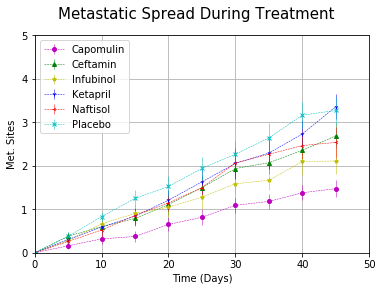

In [9]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 50, 5)

fig, bx = plt.subplots()

fig.suptitle("Metastatic Spread During Treatment", fontsize=15 )

bx.set_xlim(0, 50)
bx.set_ylim(0, 5)

bx.set_xlabel("Time (Days)")
bx.set_ylabel("Met. Sites")

plt.errorbar(mean_meta_sites_pivot.index, mean_meta_sites_pivot["Capomulin"], yerr=meta_sites_sem_pivot["Capomulin"], color="m", marker="o", markersize=4, linestyle="--", linewidth=.5)
plt.errorbar(mean_meta_sites_pivot.index, mean_meta_sites_pivot["Ceftamin"], yerr=meta_sites_sem_pivot["Ceftamin"], color="g", marker="^", markersize=4, linestyle="--", linewidth=.5)
plt.errorbar(mean_meta_sites_pivot.index, mean_meta_sites_pivot["Infubinol"], yerr=meta_sites_sem_pivot["Infubinol"], color="y", marker="*", markersize=4, linestyle="--", linewidth=.5)
plt.errorbar(mean_meta_sites_pivot.index, mean_meta_sites_pivot["Ketapril"], yerr=meta_sites_sem_pivot["Ketapril"], color="b", marker="1", markersize=4, linestyle="--", linewidth=.5)
plt.errorbar(mean_meta_sites_pivot.index, mean_meta_sites_pivot["Naftisol"], yerr=meta_sites_sem_pivot["Naftisol"], color="r", marker="3", markersize=4, linestyle="--", linewidth=.5)
plt.errorbar(mean_meta_sites_pivot.index, mean_meta_sites_pivot["Placebo"], yerr=meta_sites_sem_pivot["Placebo"], color="c", marker="x", markersize=4, linestyle="--", linewidth=.5)

plt.grid()
plt.legend(loc="best")

# Save the Figure
plt.savefig("C:/Users/Ryan/Desktop/metastaticSpread.png")

# Show the Figure
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = combined_data.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]
# Convert to DataFrame
mice_count = pd.DataFrame(({"Mouse Count": mice_count}))
# Preview DataFrame
mice_count.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [11]:
# Minor Data Munging to Re-Format the Data Frames
mice_count = mice_count.reset_index()
mice_count_pivot = mice_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]
# Preview the Data Frame
mice_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [12]:
#Convert Mouse Count to percentages 
mice_count_pivot["Capomulin"] = mice_count_pivot["Capomulin"].apply(lambda x: ((x-25)/25*100)+100)
mice_count_pivot["Ceftamin"] = mice_count_pivot["Ceftamin"].apply(lambda x: ((x-25)/25*100) + 100)
mice_count_pivot["Infubinol"] = mice_count_pivot["Infubinol"].apply(lambda x: ((x-25)/25*100) + 100)
mice_count_pivot["Ketapril"] = mice_count_pivot["Ketapril"].apply(lambda x: ((x-25)/25*100) + 100)
mice_count_pivot["Naftisol"] = mice_count_pivot["Naftisol"].apply(lambda x: ((x-25)/25*100) + 100)
mice_count_pivot["Placebo"] = mice_count_pivot["Placebo"].apply(lambda x: ((x-25)/25*100) + 100)

mice_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,26,25,26,25
5,100.0,84.0,100.0,92.0,92.0,96.0,25,25,25,24
10,100.0,80.0,84.0,88.0,84.0,96.0,23,24,23,22
15,96.0,76.0,84.0,76.0,84.0,80.0,17,24,23,21
20,92.0,72.0,80.0,76.0,80.0,76.0,17,23,21,17


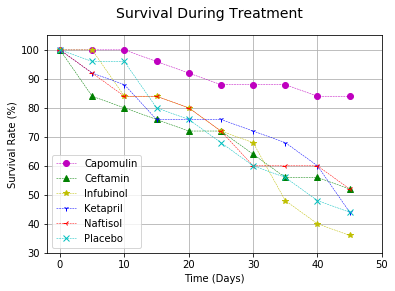

In [23]:

# Generate the Plot (Accounting for percentages)
x_axis = np.arange(0, 50, 5)

fig, cx = plt.subplots()

fig.suptitle("Survival During Treatment", fontsize=14 )

cx.set_xlim(-2, 50)
cx.set_ylim(30, 105)

cx.set_xlabel("Time (Days)")
cx.set_ylabel("Survival Rate (%)")

cx.plot(x_axis, mice_count_pivot.Capomulin.values, linestyle='--', linewidth=0.5, marker='o', color="m", label="Capomulin")
cx.plot(x_axis, mice_count_pivot.Ceftamin.values, linestyle='--', linewidth=.5, marker = '^', color="g", label="Ceftamin")
cx.plot(x_axis, mice_count_pivot.Infubinol.values, linestyle='--', linewidth=0.5, marker='*', color="y", label="Infubinol")
cx.plot(x_axis, mice_count_pivot.Ketapril.values, linestyle='--', linewidth=0.5, marker='1', color="b", label="Ketapril")
cx.plot(x_axis, mice_count_pivot.Naftisol.values, linestyle='--', linewidth=.5, marker='3', color= "r", label="Naftisol")
cx.plot(x_axis, mice_count_pivot.Placebo.values, linestyle='--', linewidth=0.5, marker='x', color="c",  label="Placebo")

plt.grid()
plt.legend(loc="best")

# # Save the Figure
plt.savefig("C:/Users/Ryan/Desktop/mice_survival.png")
# # #print figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()